In [1]:
from Bio import SeqIO, pairwise2
from Bio.Seq import Seq
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance

In [2]:
record = SeqIO.read('a.fasta', 'fasta')
seqA = record.seq
record = SeqIO.read('b.fasta', 'fasta')
seqB = record.seq
record = SeqIO.read('c.fasta', 'fasta')
seqC = record.seq
record = SeqIO.read('d.fasta', 'fasta')
seqD = record.seq


In [3]:
print("Seq A:", seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

Seq A: AAAGACTTTAAAATCAAAAAAAAATGGGAACAGGAGAGCATTGGAAGACTTTTTAAAAATGTTATTGTTCACATGAAGGGTACGCTTCTGTTTGATGGGAACGCAAAAGAAGCCTTTGAGAAAGCCAAAGAGGCAAACGAAGGGGAGCTGAAAATGAAGGGCAGCAGCGTTACCTGGCAGGTACTGGAGGGAGATGAAGAGAAAGAGATGCTGAAGAAGATCATTGAAGCCCAACAGGAATCATACAATCGATCAAAAGGCAGAGGCGGGAGAGGAAGATCTGGCGGCAGAGGAAGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGGCAGGACTCAGTTCCAGGGGAAGAAAACGAAATTTGACAGTGATAATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGAGAGCTTGAAGACGCAGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAAAACGGCTCGTAATGTGGAGACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGATGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGAAGCGGTAGGAAG

In [5]:
seqPart = seqA[10:67]
print("11 to 67:", seqPart)
print("length:", len(seqPart))

11 to 67: AAATCAAAAAAAAATGGGAACAGGAGAGCATTGGAAGACTTTTTAAAAATGTTATTG
length: 57


In [6]:
nt_search(str(seqA), 'GGTA')

['GGTA', 78, 179, 984]

In [8]:
temp = [x for x in seqA if x in 'AGTC']
temp = ''.join(temp)
print(len(temp))
print("GC:", GC(temp))
print("AT:", 100-GC(temp))

1206
GC: 39.30348258706468
AT: 60.69651741293532


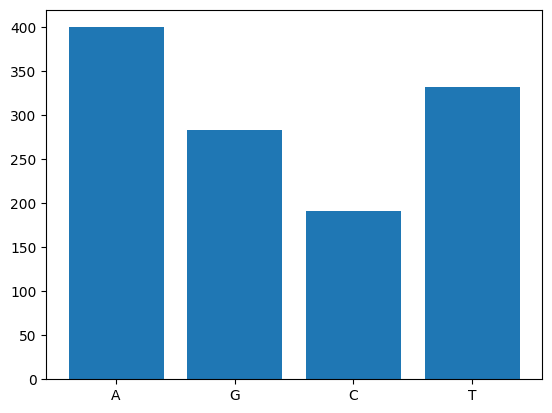

In [9]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [10]:
print("tm_wallace:", mt.Tm_Wallace(seqA))
print("tm_GC:", mt.Tm_GC(seqA))
print("tm_NN:", mt.Tm_NN(seqA))

tm_wallace: 3360.0
tm_GC: 75.27180768830074
tm_NN: 78.14267580214818


In [11]:
print("molecular weight:", mw(seqA))

molecular weight: 374691.7512000026


In [12]:
localAlignxx = pairwise2.align.localxx(seqA, seqB)
print(pairwise2.format_alignment(*localAlignxx[0]))

4 GA---CT-T----TAAA-A-TCAAAAAAAA------AT----GGG-AACAGG----AGAGCATTGGAAGACTTTTTA-AAA-ATGTTA-TTGTTCACATG-AAGGGT-ACG-CTTCTGTTTGA-TGGGA-ACGCAAAAGAAGCCTT-TGAGAAAGCCA-A-AGA--GGCAAACGA--AG-GGGAGCTGAAAATGAAGGGCAGCAGCGTTA-CCTGGCAGGTACTGG-AG-GGAGATGAAGA--GAAAGA-GATG-CTGAAGAAGATCA--T--T-G-AAGCCCAACAGGAATCATACAA---TCGA-TCAAA--AGGCAGAGG--CGGGAGAGGAAGATCTGGCGGCA-G---AG---G------A--AGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGG---CAGGACTCA-GTT--C-C----AGGGGAA--GAAAACGAAATTTGA-C--AGT-GAT-AATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGA-GAGC--TTGAAGACG-C--AGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAA----AACG--GCTCGTA-ATG-TGGA-GAC-GACGTCCA-GAGTTTTT--T-CTTTAGCAAA--CAGATTTATTACA-AACGGTGAA--AAATGC--AGA-GGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCT--TTGGAGA-ATCGGAGA---A-AGTCCACCTGGATGTCAACCTGAAGAAACATTTG-GAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTT---ATTTTTTG----CCTCTTATTTGTATGTTTTCTTTTCTCAACG-AAA-AATGTTTTA-ATTTTAGCACAATCAAC-GTA-AACCT-GACGGTCTAAT-T---T-CAT-CTGAGTGAT-AGC-TAGA--ATTAGTGTGCCATTGGTTGTTT-GTTTT-CATTTTGTAGATTTACTACATTGAGTG-ATGCG

In [13]:
localAlignmx = pairwise2.align.localmx(seqA, seqC, 2, -1)
print(pairwise2.format_alignment(*localAlignmx[0]))

4 GACTTTAAAATCAAAAAAAAATGGGAACAG--GAGAGCATT-G-GAA-GACTTTTTAAAAA--T---GTTATTGT--TCA--CA-TGA-AGGGTACGCTTCTGTTTGATGGGAAC---G-CAAAAGAA-GC-CTTTGA-GAAA-GC-CAAAGA-GG------CAAAC----GAAGGG---GAG-CTGAAAAT-GA--AGGGC-AG-----CA--GCGTT-ACCTGGCAGGTAC-TGGAGGGAGA-TGAAGAGAAAGAGATGCTGAAGAAGATCATTGAAGCCC-AACAGGAATC-A-TACAATCGATCAAAAGG-CAGAGGCGGGAGAGGAA-GATCTGG-CGGCAGAGGAAGA-G-GA---GGC-CG--AA--GG-G-GAAGA-GGTGGCAGAGATCAAGGCA--GG-ACTCAGTTCCAGGGGAA-GAAA-ACGAAATTTGACAGTGATAATGAGGATGACGACGAGGG-TGAGGAAGCACCTGCAGCCCCAAAGAGAGAGCTTGAAGAC-GCAGAC-GGTCCTCCAGCGAAAGT--TTTCAAAA-CTGAAAACGGCTCGTAATGTG--GA-GACGACG-TCCAGAGTTTTTTCTT--TAG-CAAACAGATTTAT-TAC-AAACGGT-GAA-AAA-TGCAGAGGCAAC-T-TAAAGCC-CA-TT-CCAG-TAAAAAAC-A-T-T--CAGGC-T--TTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAA-CATTTG-GAAA-A----CTTGGAGT--CAGT--T-T-TCAGCTTT-T-TA-A-G-CCCTTTATTTTT-TGCCTCTTATTTGTATGTTTTCTTTTCTCAACGAAAAATGTTTTAATTTTA---GCACAATCAACG-TAAACCT---G--ACG-GTCTAATTTCATCTGA----GT-GATAGCTAGAATTAGTGTGCCATTGGTTGTT--TGTTTTCAT-TTTGTAGAT-TTACTACATTG-AGTG-ATGCGA-ATGTG

In [14]:
localAlignms = pairwise2.align.localms(seqA, seqD, 2, -1, -1, -.5)
print(pairwise2.format_alignment(*localAlignms[0]))

52 TTTAAAAATGT-TAT---T---GTT-C-A-CA-TGAAGGGTACGCTTCTGT--T-TG------A--T-GG--G-A--A--CGC--AAAAGAAGCC----TTTGAGAAAGCCAAAGAGGCAA-ACGAAGG-GGAG---CTG-A---AAATG--AAGGGCAGCAGC---GTTACCTGG-CA-G-G-T-A-----CTG-G--AGGG--------AGATGAAGAG---AAAG--AG-AT-GCTGAAGAAGATCATTGAAGCC-CAACAGGAATCA-TACA-ATCGATCAAAAGGCAGAGG---CGGGAGAGGAAGAT--CT--GGC-GG----CAGAGGAAG-AGGAGGCC--GAAGGGGAAGAGGTGGCAGA-GATCAAGGCAGGACTCAGTT-CCAGGGGAAGAAA-ACGAAATTTG--ACAGTGATAATGA-GGATGACGAC-GAGGGTG---AGGAAGCACCTG-----CAGCC--CCAAAGAGAGAGCTTGAAGACGCAGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAAAACGGCTCGTAATGTGGAGACGACGTCCAGAGT----TTTTTCTTTAG---CAAACA-GA-TTTAT-TACAAACGGTGAAAAA----TGCA----GAG-GCAACT-TAAAGCCCATTCCAGTAAAAAACATTCA-G-GCTT--TGGAGA--ATC--GGAGAAA-G--TC-CACCTGGATGTCAACCTGAAGAAACATTTG-GAAAACTTGGAGTCAGTTTTCA-G--CTTTTTAAGC-CCTT-TATT----TTTTGCCTCTTATTTGTATGTTTTCTTTT-C-TCAACGAAAAATGTTTTA--ATTT-TAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTG-T-GCCAT-TGGTTGTTTGTTTT--CATTTTGT-AGA-TT-T--A-CTACAT-----TGAGTGA--TGCG----AATGTGTC-ATGAATTTCGTTT

In [15]:
globalAlignxx = pairwise2.align.globalxx(seqA, seqB)
print(pairwise2.format_alignment(*globalAlignxx[0]))

AAAGA---CT-T----TAAA-A-TCAAAAAAAA------AT----GGG-AACAGG----AGAGCATTGGAAGACTTTTTA-AAA-ATGTTA-TTGTTCACATG-AAGGGT-ACG-CTTCTGTTTGA-TGGGA-ACGCAAAAGAAGCCTT-TGAGAAAGCCA-A-AGA--GGCAAACGA--AG-GGGAGCTGAAAATGAAGGGCAGCAGCGTTA-CCTGGCAGGTACTGG-AG-GGAGATGAAGA--GAAAGA-GATG-CTGAAGAAGATCA--T--T-G-AAGCCCAACAGGAATCATACAA---TCGA-TCAAA--AGGCAGAGG--CGGGAGAGGAAGATCTGGCGGCA-G---AG---G------A--AGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGG---CAGGACTCA-GTT--C-C----AGGGGAA--GAAAACGAAATTTGA-C--AGT-GAT-AATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGA-GAGC--TTGAAGACG-C--AGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAA----AACG--GCTCGTA-ATG-TGGA-GAC-GACGTCCA-GAGTTTTT--T-CTTTAGCAAA--CAGATTTATTACA-AACGGTGAA--AAATGC--AGA-GGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCT--TTGGAGA-ATCGGAGA---A-AGTCCACCTGGATGTCAACCTGAAGAAACATTTG-GAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTT---ATTTTTTG----CCTCTTATTTGTATGTTTTCTTTTCTCAACG-AAA-AATGTTTTA-ATTTTAGCACAATCAAC-GTA-AACCT-GACGGTCTAAT-T---T-CAT-CTGAGTGAT-AGC-TAGA--ATTAGTGTGCCATTGGTTGTTT-GTTTT-CATTTTGTAGATTTACTACATTGAGTG-ATGC

In [16]:
globalAlignmx = pairwise2.align.globalmx(seqA, seqB, 2, -1)
print(pairwise2.format_alignment(*globalAlignmx[0]))

AAAGA---CT-T----TAAA-A-TCAAAAAAAA------AT----GGG-AACAGG----AGAGCATTGGAAGACTTTTTA-AAA-ATGTTA-TTGTTCACATG-AAGGGT-ACG-CTTCTGTTTGA-TGGGA-ACGCAAAAGAAGCCTT-TGAGAAAGCCA-A-AGA--GGCAAACGA--AG-GGGAGCTGAAAATGAAGGGCAGCAGCGTTA-CCTGGCAGGTACTGG-AG-GGAGATGAAGA--GAAAGA-GATG-CTGAAGAAGATCA--T--T-G-AAGCCCAACAGGAATCATACAA---TCGA-TCAAA--AGGCAGAGG--CGGGAGAGGAAGATCTGGCGGCA-G---AG---G------A--AGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGG---CAGGACTCA-GTT--C-C----AGGGGAA--GAAAACGAAATTTGA-C--AGT-GAT-AATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGA-GAGC--TTGAAGACG-C--AGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAA----AACG--GCTCGTA-ATG-TGGA-GAC-GACGTCCA-GAGTTTTT--T-CTTTAGCAAA--CAGATTTATTACA-AACGGTGAA--AAATGC--AGA-GGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCT--TTGGAGA-ATCGGAGA---A-AGTCCACCTGGATGTCAACCTGAAGAAACATTTG-GAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTT---ATTTTTTG----CCTCTTATTTGTATGTTTTCTTTTCTCAACG-AAA-AATGTTTTA-ATTTTAGCACAATCAAC-GTA-AACCT-GACGGTCTAAT-T---T-CAT-CTGAGTGAT-AGC-TAGA--ATTAGTGTGCCATTGGTTGTTT-GTTTT-CATTTTGTAGATTTACTACATTGAGTG-ATGC

In [17]:
globalAlignms = pairwise2.align.globalms(seqA, seqD, 2, -1, -1, -.5)
print(pairwise2.format_alignment(*globalAlignms[0]))

AAAGACTTTAAAATCAAAAAAAAATGG--GAACAG--GAGAGCA-T-T-GGAAGACTTT--T-T---AAAAATGTTATTGTTCA-CATGAAGGGTACGCTTCTGTTTGATGGGAACGCAAAAGAAGCCTTTG-AGAAAGCCAAAGAGGCAA-ACGAAGG-GGAG---CTG-A---AAATG--AAGGGCAGCAGC---GTTACCTGG-CA-G-G-T-A-----CTG-G--AGGG--------AGATGAAGAG---AAAG--AG-AT-GCTGAAGAAGATCATTGAAGCC-CAACAGGAATCA-TACA-ATCGATCAAAAGGCAGAGG---CGGGAGAGGAAGAT--CT--GGC-GG----CAGAGGAAG-AGGAGGCC--GAAGGGGAAGAGGTGGCAGA-GATCAAGGCAGGACTCAGTT-CCAGGGGAAGAAA-ACGAAATTTG--ACAGTGATAATGA-GGATGACGAC-GAGGGTG---AGGAAGCACCTG-----CAGCC--CCAAAGAGAGAGCTTGAAGACGCAGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAAAACGGCTCGTAATGTGGAGACGACGTCCAGAGT----TTTTTCTTTAG---CAAACA-GA-TTTAT-TACAAACGGTGAAAAA----TGCA----GAG-GCAACT-TAAAGCCCATTCCAGTAAAAAACATTCA-G-GCTT--TGGAGA--ATC--GGAGAAA-G--TC-CACCTGGATGTCAACCTGAAGAAACATTTG-GAAAACTTGGAGTCAGTTTTCA-G--CTTTTTAAGC-CCTT-TATT----TTTTGCCTCTTATTTGTATGTTTTCTTTT-C-TCAACGAAAAATGTTTTA--ATTT-TAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTG-T-GCCAT-TGGTTGTTTGTTTT--CATTTTGT-AGA-TT-T--A-CTACAT-----TGAGTGA--TGC

In [18]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

print("hamming distance:", hamming(seqA, seqB))
print("hamming distance:", hamming(seqA, seqC))
print("hamming distance:", hamming(seqA, seqD))

hamming distance: 614
hamming distance: 579
hamming distance: 881


In [19]:
print("levenshtein distance:", distance(seqA, seqB))
print("levenshtein distance:", distance(seqA, seqC))
print("levenshtein distance:", distance(seqA, seqD))

levenshtein distance: 661
levenshtein distance: 697
levenshtein distance: 671
